# GeoPandas

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import rtree
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Reading and Writing Files

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  #read the file
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


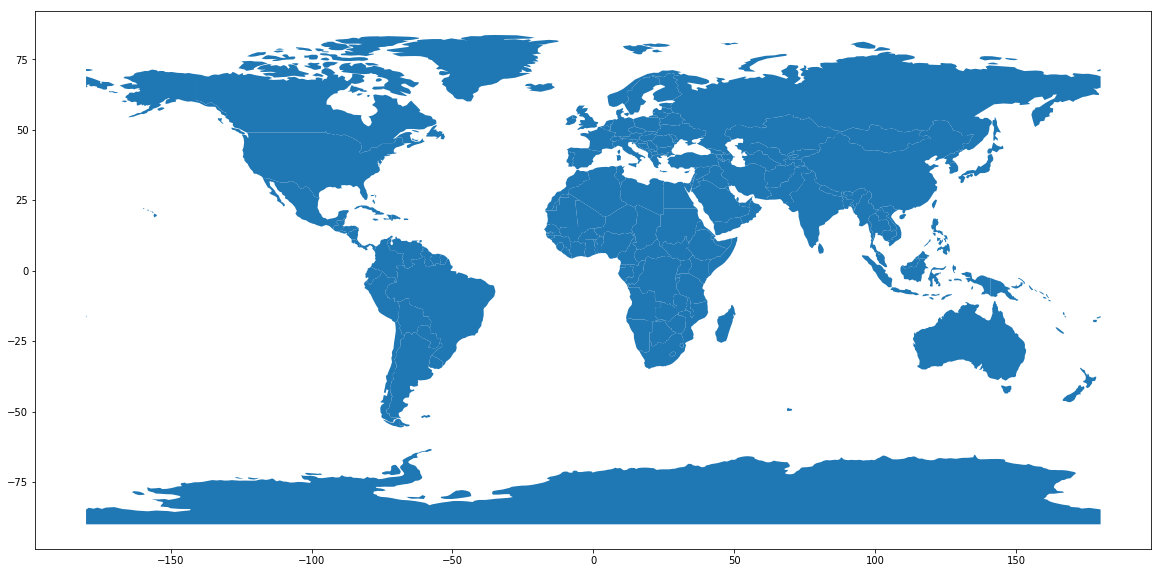

In [3]:
world.plot(figsize=(20,20))

In [4]:
world.geometry.name  #get active geometry column name

'geometry'

In [5]:
world['centroid_column'] = world.centroid
world = world.set_geometry('centroid_column')  # set active geometry column by your choice
world.geometry.name

'centroid_column'

Text(0.5,1,'World Centroid')

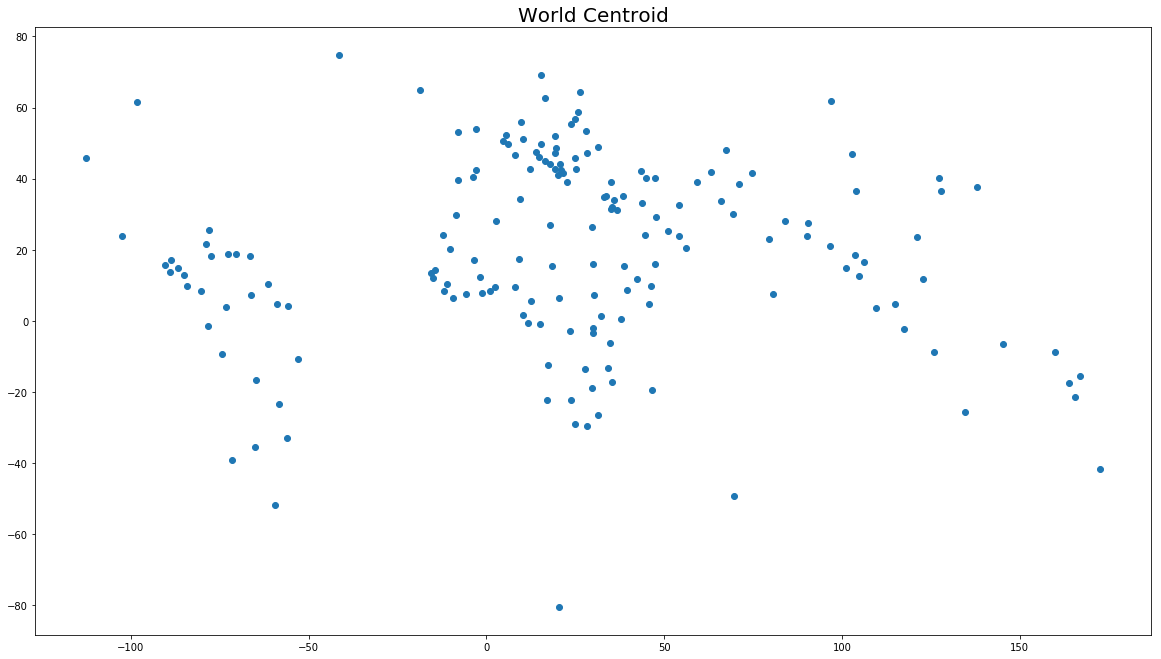

In [6]:
world.plot(figsize=(20,20))
plt.title('World Centroid', fontsize=20)

In [7]:
world.rename(columns={'centroid_column':'centroid'}).set_geometry('centroid', inplace=True)

In [8]:
world.geometry.name

'centroid_column'

In [9]:
import fiona 
from fiona import drivers
help(fiona.open)

Help on function open in module fiona:

open(path, mode='r', driver=None, schema=None, crs=None, encoding=None, layer=None, vfs=None, enabled_drivers=None, crs_wkt=None)
    Open file at ``path`` in ``mode`` "r" (read), "a" (append), or
    "w" (write) and return a ``Collection`` object.
    
    In write mode, a driver name such as "ESRI Shapefile" or "GPX" (see
    OGR docs or ``ogr2ogr --help`` on the command line) and a schema
    mapping such as:
    
      {'geometry': 'Point',
       'properties': [('class', 'int'), ('label', 'str'),
                      ('value', 'float')]}
    
    must be provided. If a particular ordering of properties ("fields"
    in GIS parlance) in the written file is desired, a list of (key,
    value) pairs as above or an ordered dict is required. If no ordering
    is needed, a standard dict will suffice.
    
    A coordinate reference system for collections in write mode can be
    defined by the ``crs`` parameter. It takes Proj4 style mappings lik

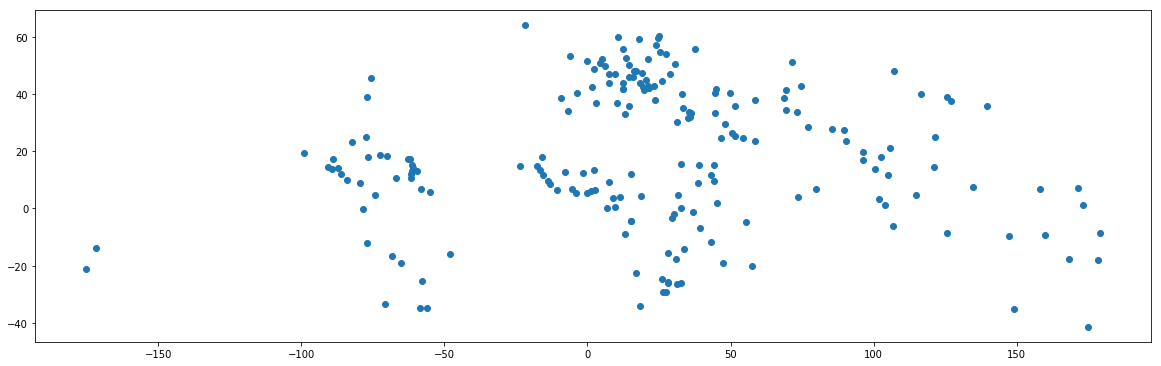

In [10]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.plot(figsize=(20,20))

In [11]:
#world.to_file("World_SHP.shp")
#world.to_file("World_JSON.geojson", driver='GeoJSON')
#world.to_file("World_Package.gpkg", layer='countries', driver="GPKG")

## Chloropleth Map

In [12]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In [13]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

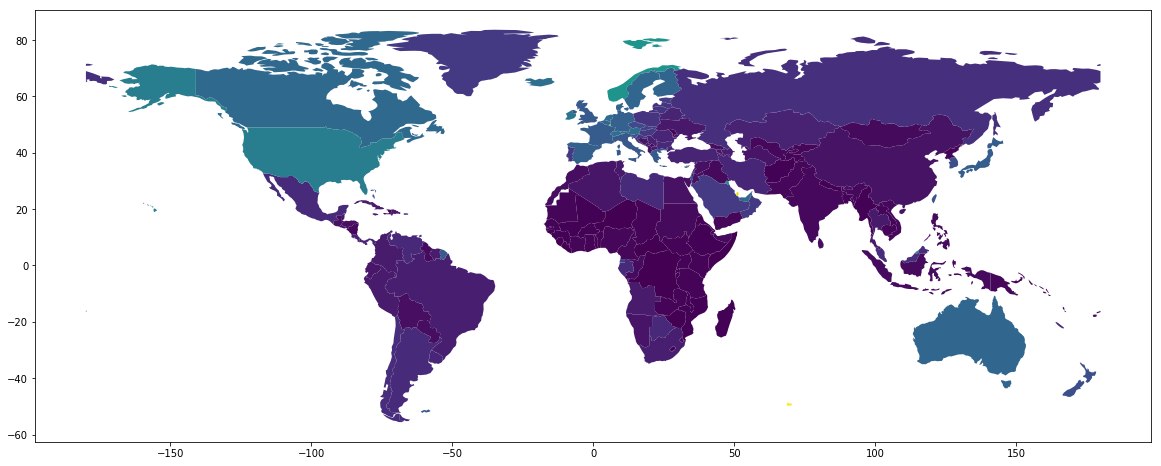

In [14]:
world = world.set_geometry('geometry')
world.plot(column='gdp_per_cap', figsize=(20,20))

In [15]:
world.crs

{'init': 'epsg:4326'}

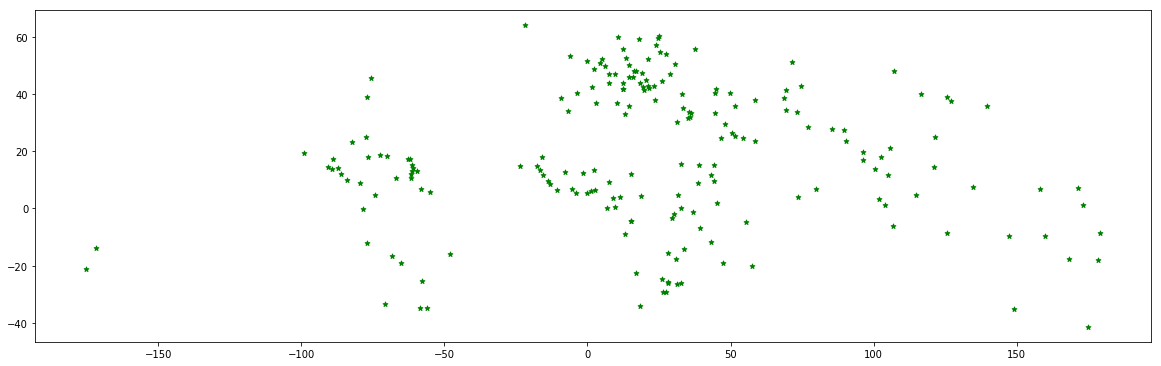

In [16]:
cities.plot(marker='*', color='green', markersize=25, figsize=(20,20))

## One graph on another graph

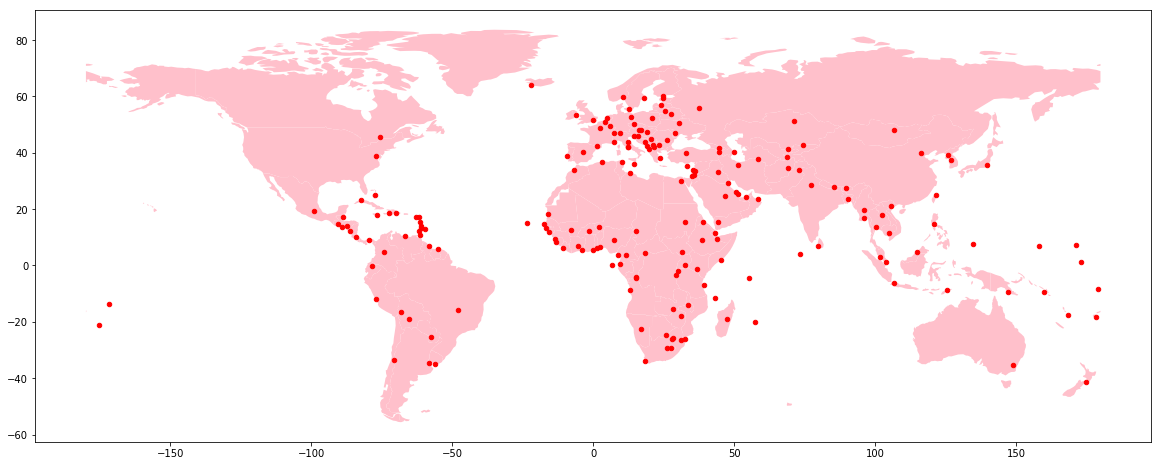

In [17]:
base = world.plot(color='pink', figsize=(20,20))
cities.plot(ax=base, marker='o', markersize=20, color='red')

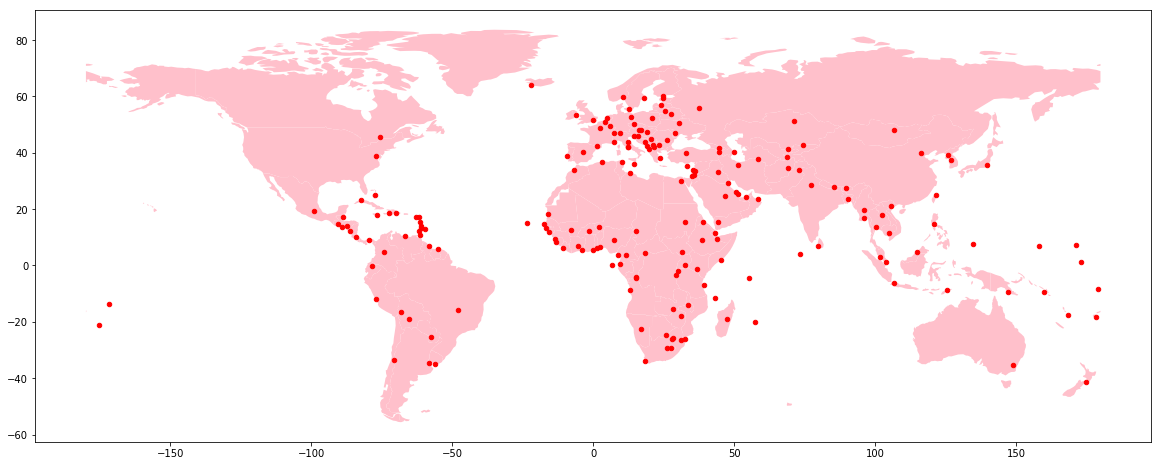

In [18]:
cities = cities.to_crs(world.crs)
base = world.plot(color='pink', figsize=(20,20))
cities.plot(ax=base, marker='o', markersize=20, color='red')

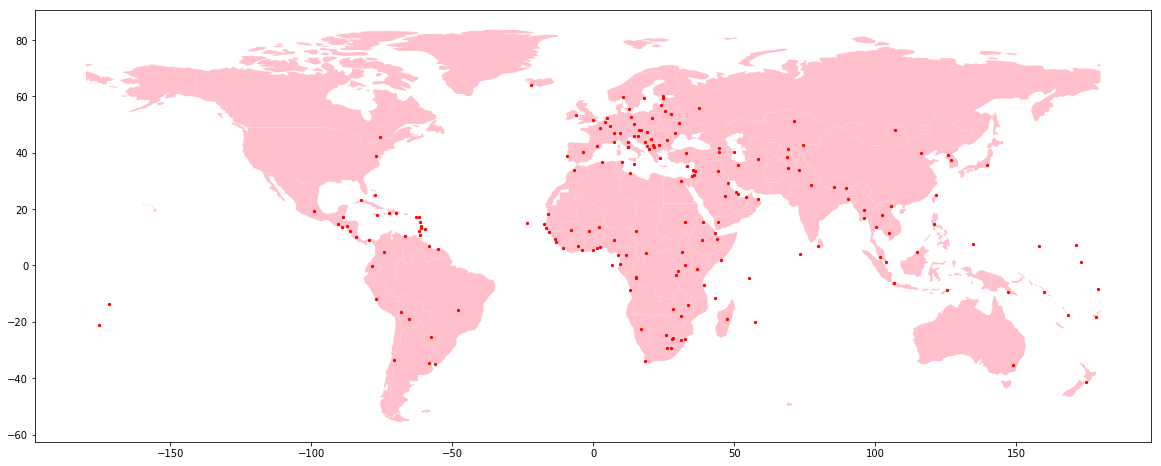

In [19]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
world.plot(ax=ax, color='pink')
cities.plot(ax=ax, marker='o', color='red', markersize=5)


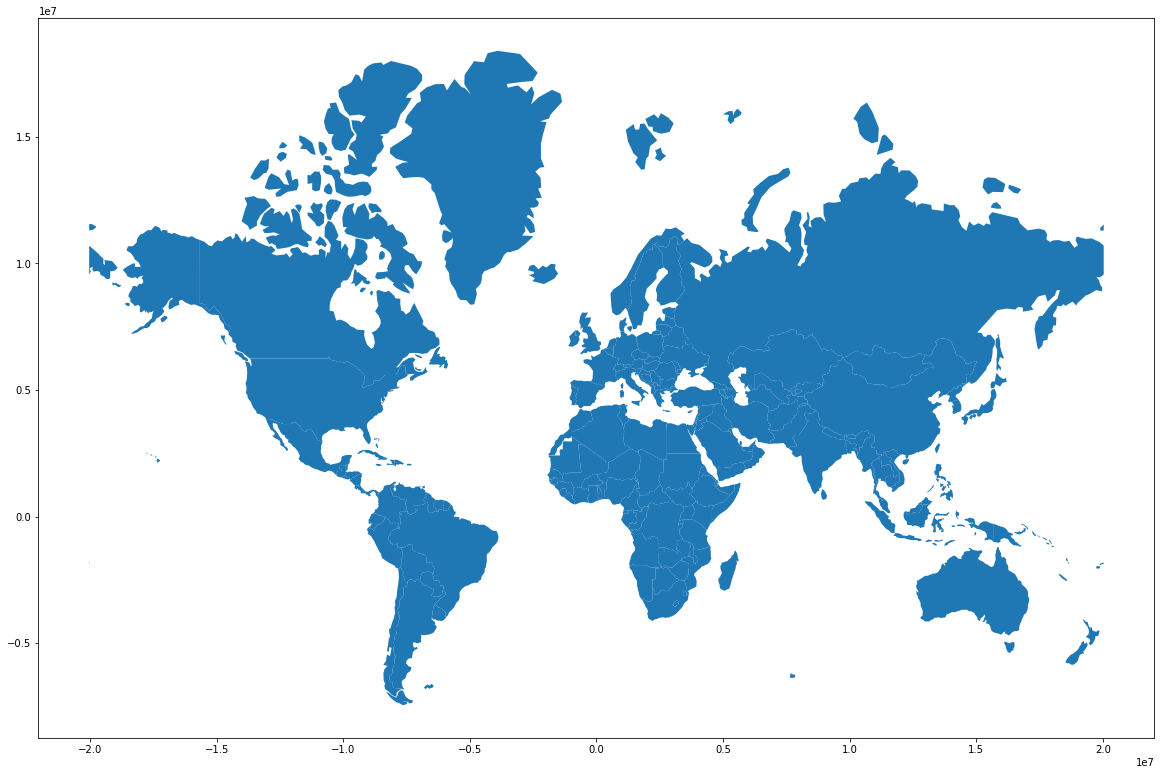

In [20]:
world = world.to_crs({'init':'epsg:3395'})
world.plot(figsize=(20,20))

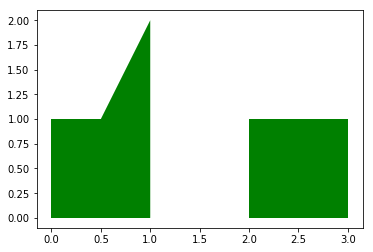

In [21]:
from shapely.geometry import Polygon
p1 = Polygon([(0, 0), (1, 0), (1, 2)])
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = gpd.GeoSeries([p1, p2, p3])
g.plot(color='green')

In [22]:
g.area

0    1.0
1    1.0
2    1.0
dtype: float64

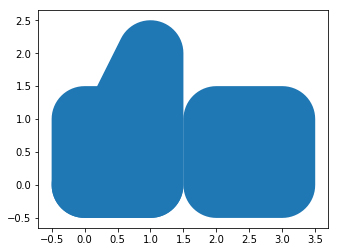

In [23]:
g.buffer(0.5).plot()

In [24]:
import os
boros = gpd.GeoDataFrame.from_file('C:\\Users\\Deepika\\Desktop\\Digital Vidya\\Data Science Using Python\\Data Sets\\GeoData\\taxi_zones.shp')

In [25]:
boros.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


In [26]:
boros.set_index('OBJECTID', inplace=True)
boros.sort_values(by='OBJECTID')
boros

,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
OBJECTID,,,,,,
1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."
6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ..."
7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,..."
8,0.027591,0.000027,Astoria Park,8,Queens,"POLYGON ((1005482.276373357 221686.4661663175,..."
9,0.099784,0.000338,Auburndale,9,Queens,"POLYGON ((1043803.993348822 216615.9250395149,..."


In [27]:
boros.geometry.name

'geometry'

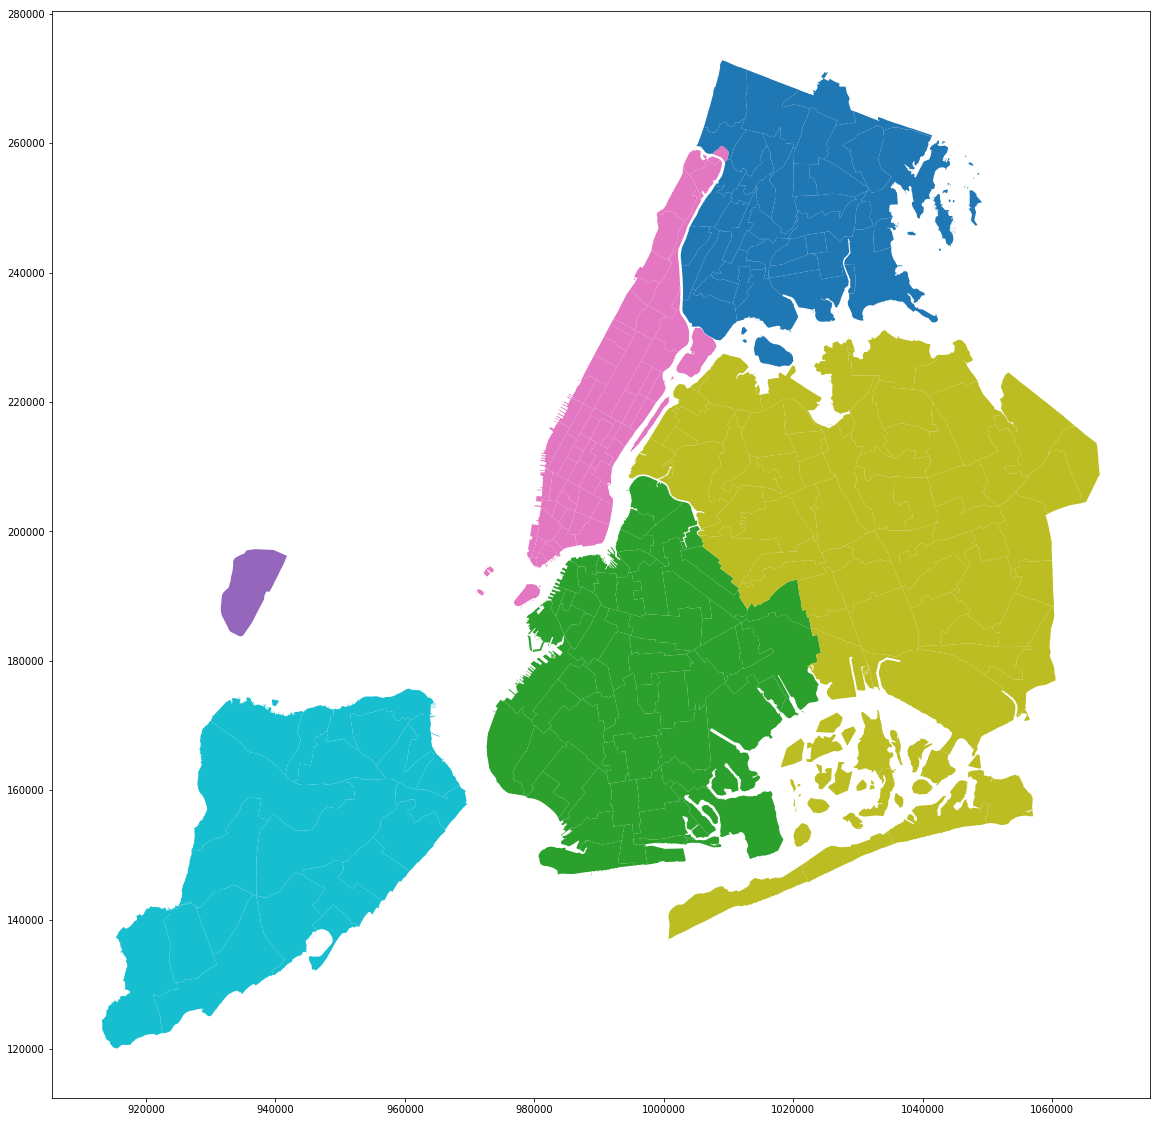

In [28]:
boros.plot(column='borough', figsize=(20,20))

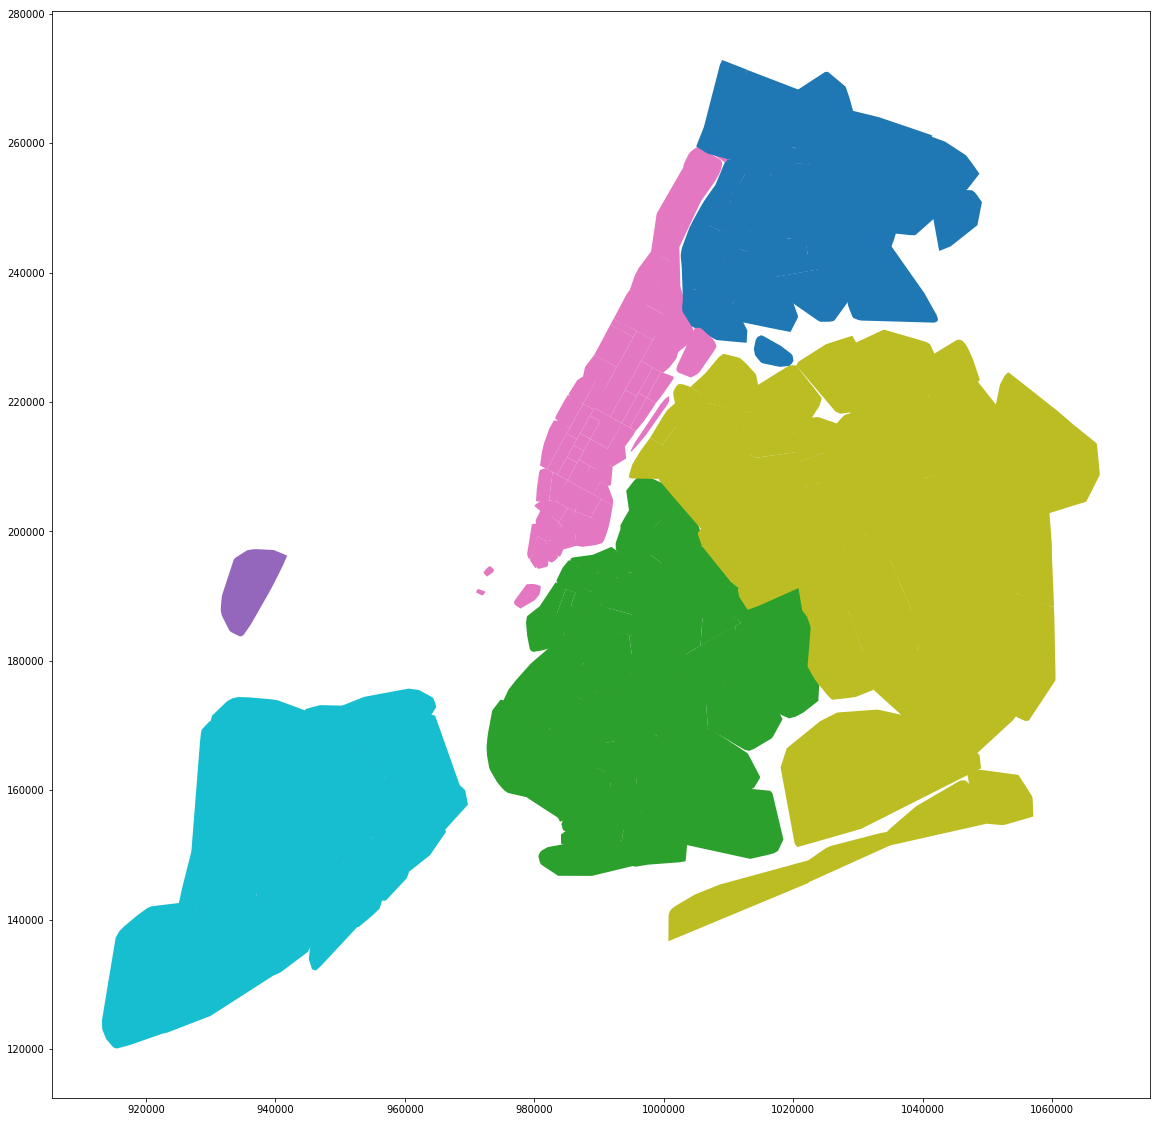

In [29]:
boros['geometry'] = boros['geometry'].convex_hull
boros.plot(column='borough', figsize=(20,20))

In [30]:
from shapely.geometry import Point
xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000
xc = (xmax - xmin) * np.random.random(2000) + xmin
yc = (ymax - ymin) * np.random.random(2000) + ymin
pts = gpd.GeoSeries([Point(x, y) for x, y in zip(xc, yc)])
pts

0       POINT (914705.7525395289 124080.4066534415)
1        POINT (955625.934823292 146412.0476168892)
2       POINT (1062809.020988142 226160.7912428672)
3       POINT (982218.3012765405 187437.8866484771)
4       POINT (1058906.023431918 259797.6492820411)
5        POINT (999253.324847166 261860.3060318399)
6       POINT (925442.7861952243 272639.4853942189)
7       POINT (970899.7985946886 218580.2166138495)
8       POINT (977304.2746614997 171181.5248610377)
9       POINT (979336.0987266432 265971.1610792867)
10      POINT (1074652.730966378 245863.3153087897)
11      POINT (1007735.677904912 233114.4578556008)
12       POINT (930117.956835798 189654.2956765846)
13       POINT (1016067.990166381 187933.701447375)
14      POINT (950691.3637208737 218486.7863212658)
15       POINT (966410.237021504 219975.0770245078)
16      POINT (932093.6620697811 175620.9294836578)
17      POINT (997691.2711427562 151290.0329845092)
18      POINT (971410.5928469234 203099.6290250155)
19      POIN

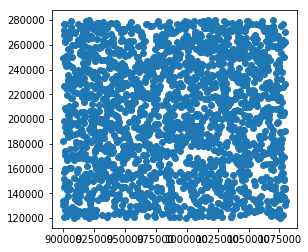

In [31]:
pts.plot()

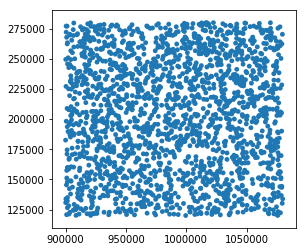

In [32]:
circles = pts.buffer(2000)
circles.plot()

In [33]:
mp = circles.unary_union

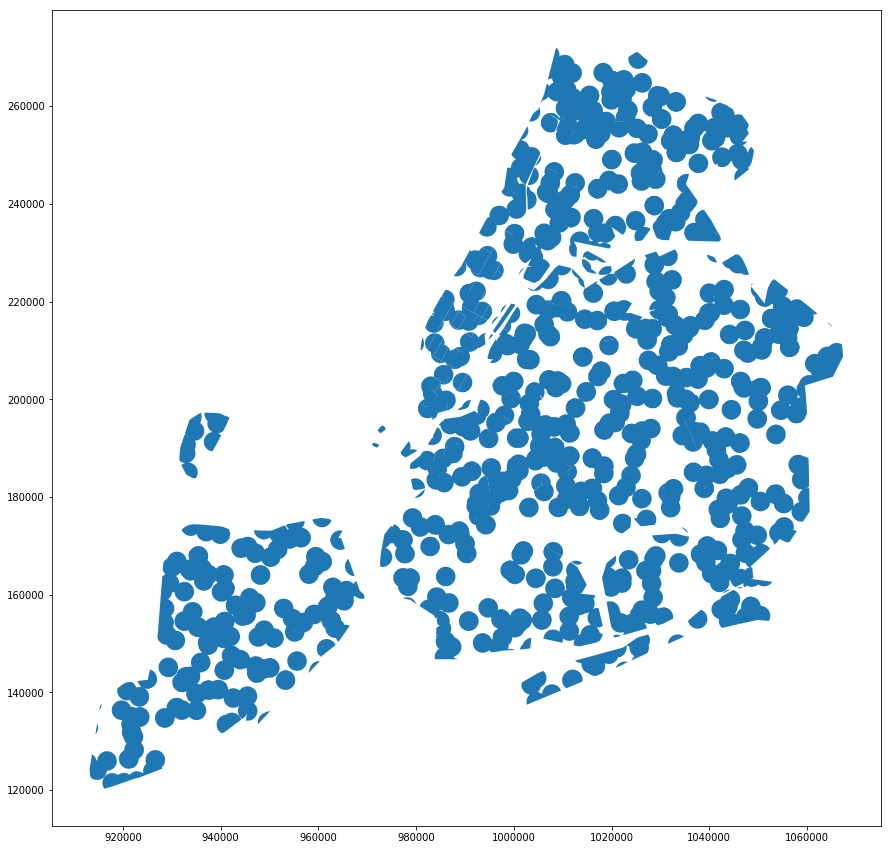

In [34]:
holes = boros['geometry'].intersection(mp)
holes.plot(figsize=(15,15))

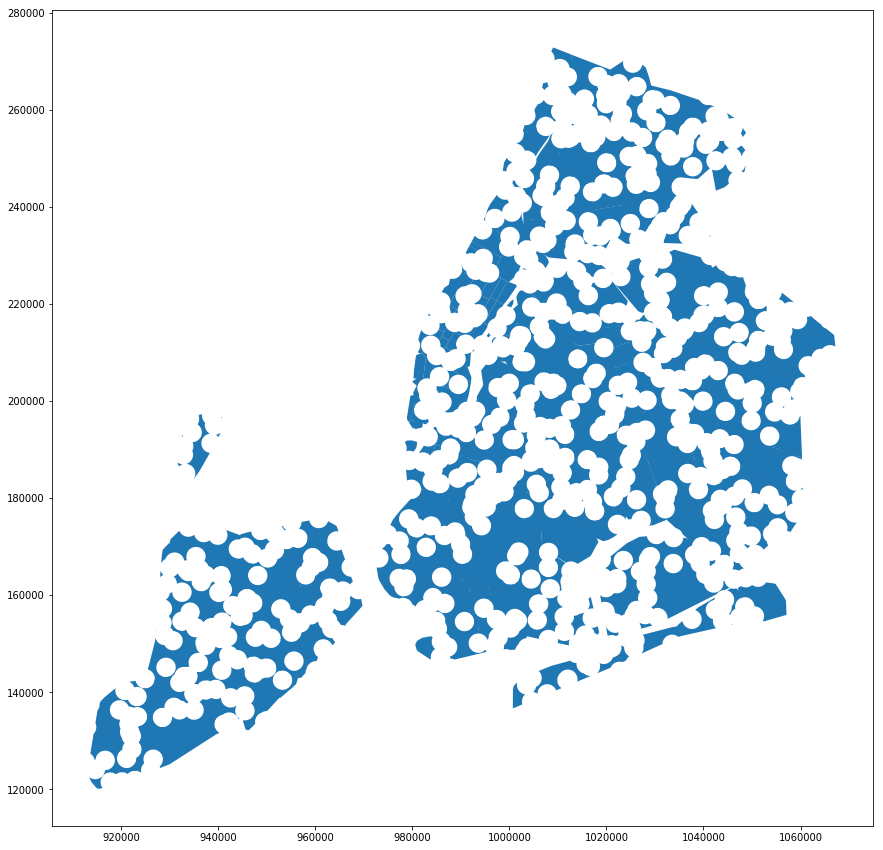

In [35]:
boros_with_holes = boros['geometry'].difference(mp)
boros_with_holes.plot(figsize=(15,15))

## Set Operations with Overlay

In [36]:
from geopandas.tools import overlay
from shapely.geometry import Polygon

In [37]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),Polygon([(2,2), (4,2), (4,4), (2,4)])])
polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]), Polygon([(3,3), (5,3), (5,5), (3,5)])])

df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

In [38]:
df1,df2

(                              geometry  df1
 0  POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))    1
 1  POLYGON ((2 2, 4 2, 4 4, 2 4, 2 2))    2,
                               geometry  df2
 0  POLYGON ((1 1, 3 1, 3 3, 1 3, 1 1))    1
 1  POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))    2)

In [39]:
res_union = gpd.overlay(df1, df2, how='union')
res_union

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((1 2, 2 2, 2 1, 1 1, 1 2))"
1,2.0,1.0,"POLYGON ((2 2, 2 3, 3 3, 3 2, 2 2))"
2,2.0,2.0,"POLYGON ((3 4, 4 4, 4 3, 3 3, 3 4))"
3,1.0,NaN,"POLYGON ((0 0, 0 2, 1 2, 1 1, 2 1, 2 0, 0 0))"
4,2.0,NaN,"(POLYGON ((2 3, 2 4, 3 4, 3 3, 2 3)), POLYGON ..."
5,NaN,1.0,"(POLYGON ((1 2, 1 3, 2 3, 2 2, 1 2)), POLYGON ..."
6,NaN,2.0,"POLYGON ((3 4, 3 5, 5 5, 5 3, 4 3, 4 4, 3 4))"


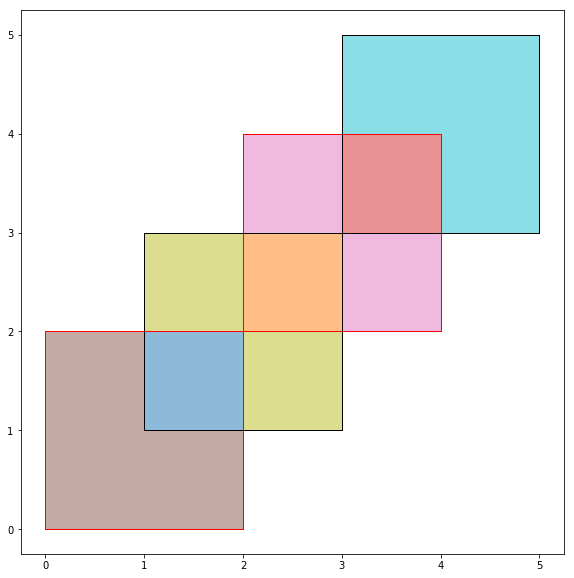

In [40]:
ax = res_union.plot(alpha=0.5, cmap='tab10', figsize=(10,10))
df1.plot(ax=ax, facecolor='none', edgecolor='r')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [41]:
res_intersection = gpd.overlay(df1, df2, how='intersection')
res_intersection

,df1,df2,geometry
0,1,1,"POLYGON ((1 2, 2 2, 2 1, 1 1, 1 2))"
1,2,1,"POLYGON ((2 2, 2 3, 3 3, 3 2, 2 2))"
2,2,2,"POLYGON ((3 4, 4 4, 4 3, 3 3, 3 4))"


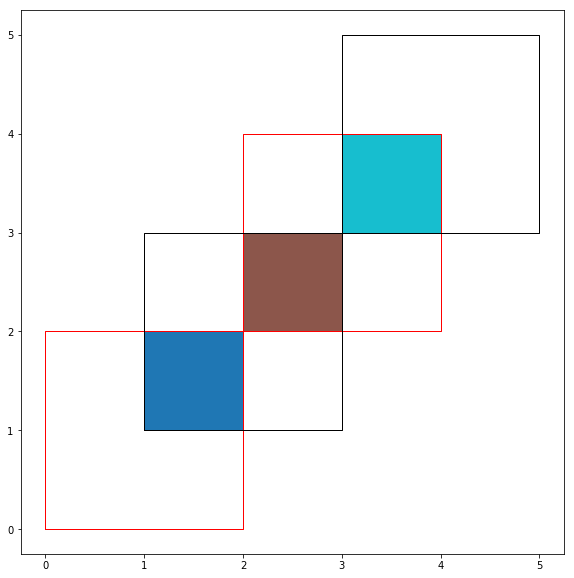

In [42]:
ax = res_intersection.plot(cmap='tab10', figsize=(10,10))
df1.plot(ax=ax, facecolor='none', edgecolor='r')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [43]:
res_symdiff = gpd.overlay(df1, df2, how='symmetric_difference')
res_symdiff

,df1,df2,geometry
0,1.0,NaN,"POLYGON ((0 0, 0 2, 1 2, 1 1, 2 1, 2 0, 0 0))"
1,2.0,NaN,"(POLYGON ((2 3, 2 4, 3 4, 3 3, 2 3)), POLYGON ..."
2,NaN,1.0,"(POLYGON ((1 2, 1 3, 2 3, 2 2, 1 2)), POLYGON ..."
3,NaN,2.0,"POLYGON ((3 4, 3 5, 5 5, 5 3, 4 3, 4 4, 3 4))"


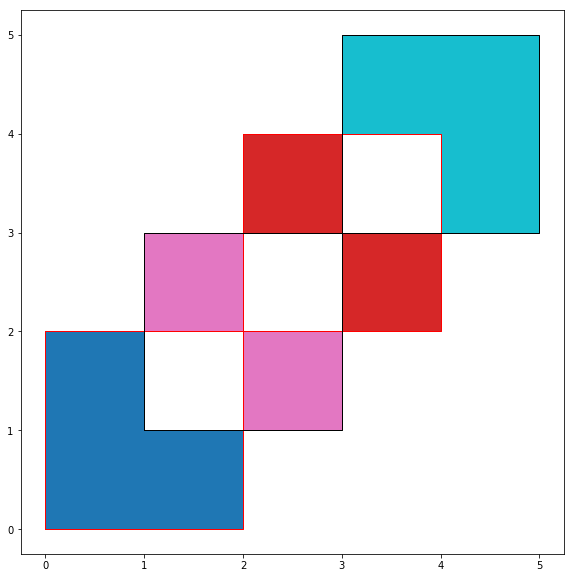

In [44]:
ax = res_symdiff.plot(cmap='tab10', figsize=(10,10))
df1.plot(ax=ax, facecolor='none', edgecolor='r')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [45]:
res_difference = gpd.overlay(df1, df2, how='difference')
res_difference

,geometry,df1
0,"POLYGON ((0 0, 0 2, 1 2, 1 1, 2 1, 2 0, 0 0))",1
1,"(POLYGON ((2 3, 2 4, 3 4, 3 3, 2 3)), POLYGON ...",2


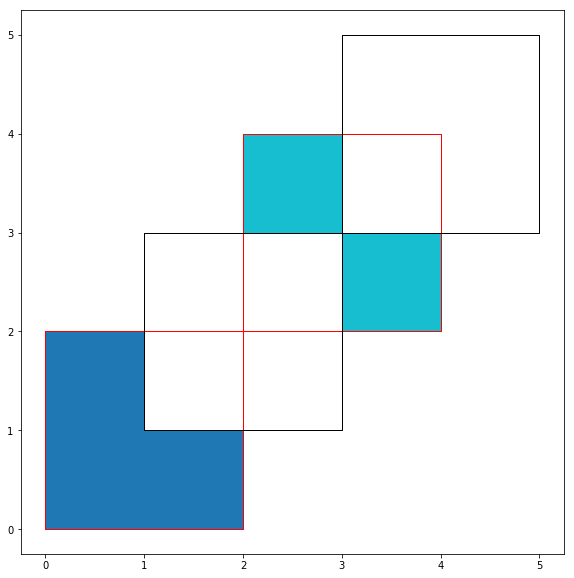

In [46]:
ax = res_difference.plot(cmap='tab10', figsize=(10,10))
df1.plot(ax=ax, facecolor='none', edgecolor='r')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [47]:
res_difference = gpd.overlay(df2, df1, how='difference')
res_difference

,geometry,df2
0,"(POLYGON ((1 2, 1 3, 2 3, 2 2, 1 2)), POLYGON ...",1
1,"POLYGON ((3 4, 3 5, 5 5, 5 3, 4 3, 4 4, 3 4))",2


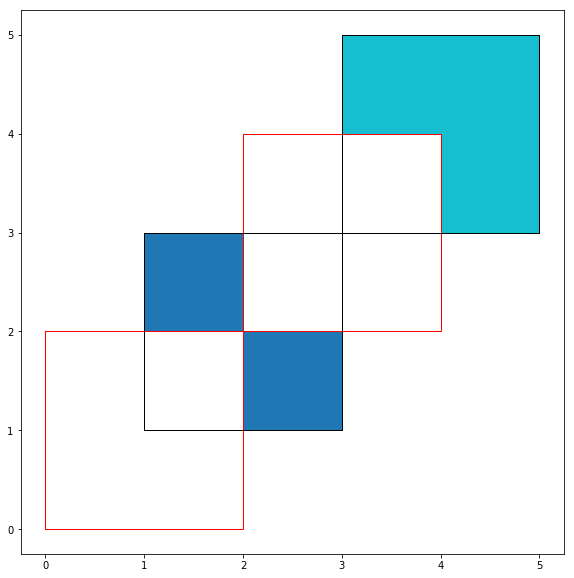

In [48]:
ax = res_difference.plot(cmap='tab10', figsize=(10,10))
df1.plot(ax=ax, facecolor='none', edgecolor='r')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [49]:
res_identity = gpd.overlay(df1, df2, how='identity')
res_identity

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((1 2, 2 2, 2 1, 1 1, 1 2))"
1,2.0,1.0,"POLYGON ((2 2, 2 3, 3 3, 3 2, 2 2))"
2,2.0,2.0,"POLYGON ((3 4, 4 4, 4 3, 3 3, 3 4))"
3,1.0,NaN,"POLYGON ((0 0, 0 2, 1 2, 1 1, 2 1, 2 0, 0 0))"
4,2.0,NaN,"(POLYGON ((2 3, 2 4, 3 4, 3 3, 2 3)), POLYGON ..."


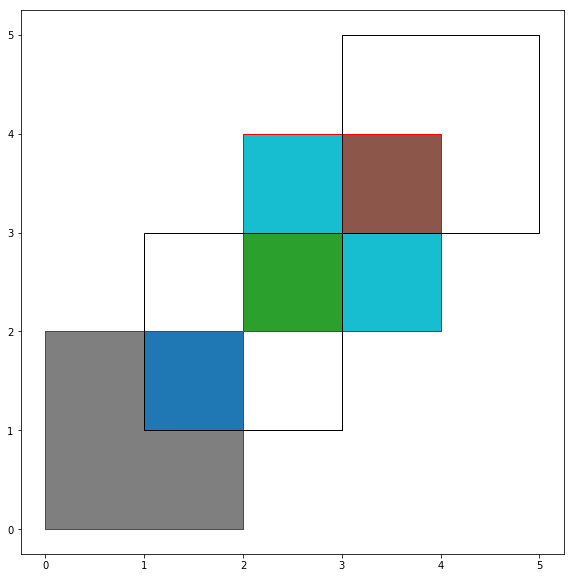

In [50]:
ax = res_identity.plot(cmap='tab10', figsize=(10,10))
df1.plot(ax=ax, facecolor='none', edgecolor='r')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [51]:
res_identity = gpd.overlay(df2, df1, how='identity')
res_identity

,df2,df1,geometry
0,1.0,1.0,"POLYGON ((1 1, 1 2, 2 2, 2 1, 1 1))"
1,1.0,2.0,"POLYGON ((2 3, 3 3, 3 2, 2 2, 2 3))"
2,2.0,2.0,"POLYGON ((3 3, 3 4, 4 4, 4 3, 3 3))"
3,1.0,NaN,"(POLYGON ((1 2, 1 3, 2 3, 2 2, 1 2)), POLYGON ..."
4,2.0,NaN,"POLYGON ((3 4, 3 5, 5 5, 5 3, 4 3, 4 4, 3 4))"


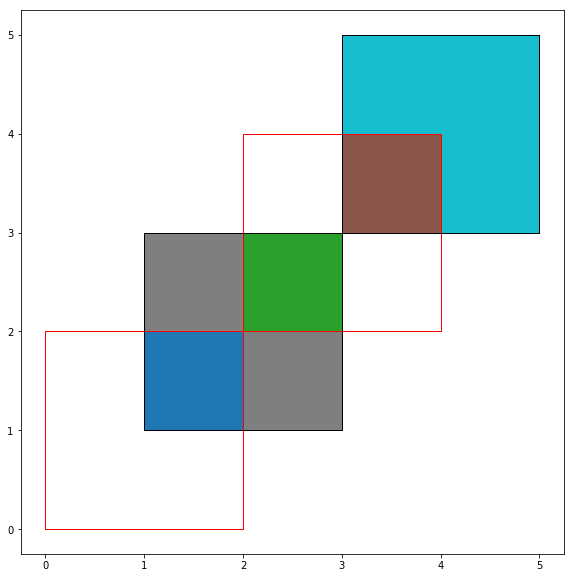

In [52]:
ax = res_identity.plot(cmap='tab10', figsize=(10,10))
df1.plot(ax=ax, facecolor='none', edgecolor='r')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [53]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Select South Amarica and some columns
countries = world[world['continent'] == "South America"]
countries = countries[['geometry', 'name']]

# Project to crs that uses meters as distance measure
countries = countries.to_crs({'init':'epsg:3395'})
capitals = capitals.to_crs({'init':'epsg:3395'})

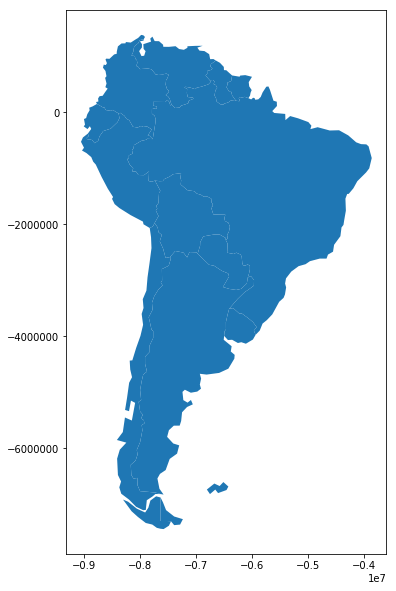

In [54]:
countries.plot(figsize=(10,10))

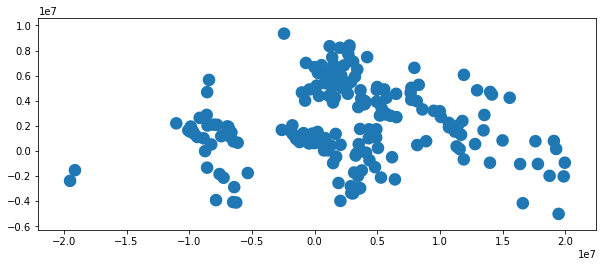

In [55]:
capitals['geometry']= capitals.buffer(500000)
capitals.plot(figsize=(10,10))

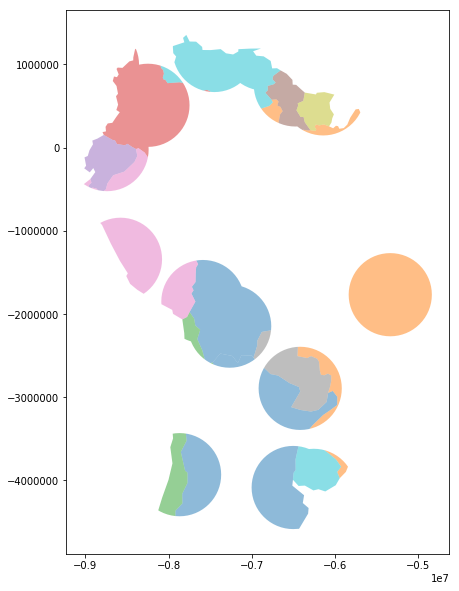

In [56]:
intersect_exm = countries['geometry'].intersection(capitals.unary_union)
intersect_exm.plot(alpha=0.5, cmap='tab10', figsize=(10,10))

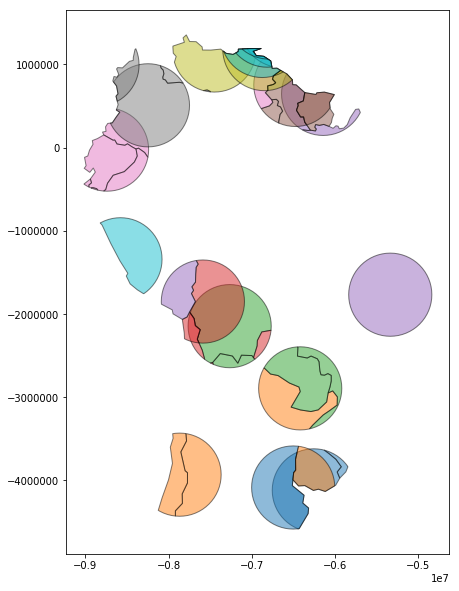

In [57]:
country_cores = gpd.overlay(countries, capitals, how='intersection')
country_cores.plot(alpha=0.5, edgecolor='k', cmap='tab10', figsize=(10,10))

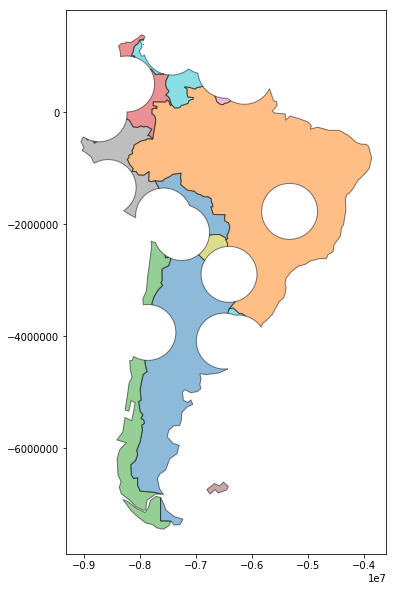

In [58]:
country_peripheries = gpd.overlay(countries, capitals, how='difference')
country_peripheries.plot(alpha=0.5, edgecolor='k', cmap='tab10', figsize=(10,10))

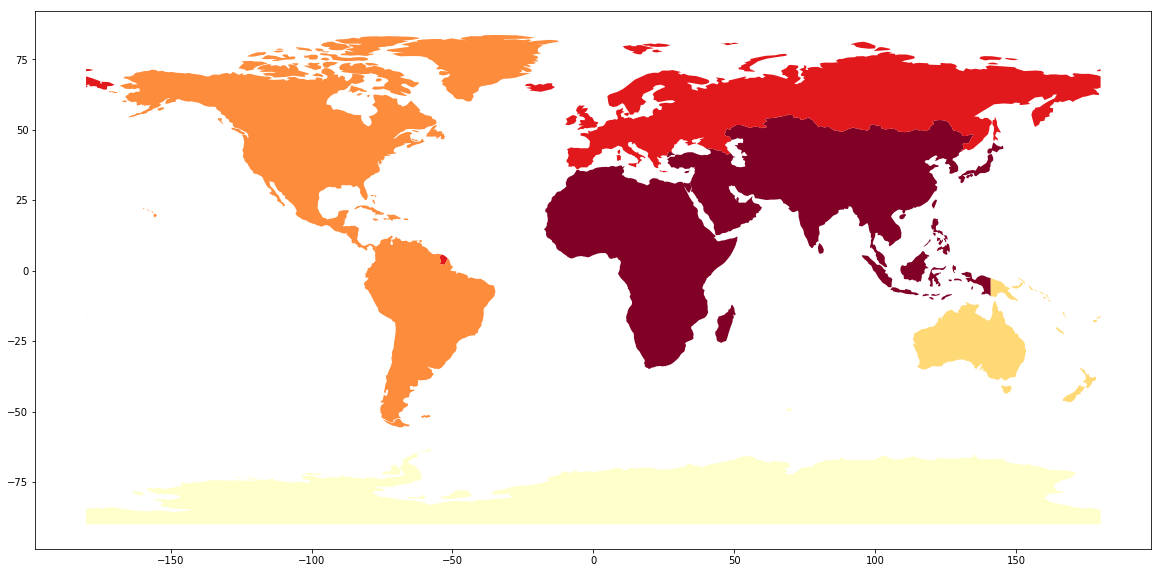

In [59]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry', 'pop_est']]
continents = world.dissolve(by='continent', aggfunc='sum')
continents.plot(column = 'pop_est', scheme='quantiles', cmap='YlOrRd', figsize=(20,20))

## Merging Data
1. Attribute Join
2. Spatial Join

In [60]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# For attribute join
country_shapes = world[['geometry', 'iso_a3']]
country_names = world[['name', 'iso_a3']]

# For spatial join
countries = world[['geometry', 'name']]
countries = countries.rename(columns={'name':'country'})

In [61]:
country_shapes.head()

,geometry,iso_a3
0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG
1,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO
2,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB
3,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE
4,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG


In [62]:
country_names.head()

,name,iso_a3
0,Afghanistan,AFG
1,Angola,AGO
2,Albania,ALB
3,United Arab Emirates,ARE
4,Argentina,ARG


In [63]:
country_shapes = country_shapes.merge(country_names, on='iso_a3')
country_shapes

,geometry,iso_a3,name
0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan
1,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola
2,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania
3,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates
4,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina
5,"POLYGON ((43.58274580259273 41.09214325618257,...",ARM,Armenia
6,(POLYGON ((-59.57209469261153 -80.040178725096...,ATA,Antarctica
7,"POLYGON ((68.935 -48.62500000000001, 69.58 -48...",ATF,Fr. S. Antarctic Lands
8,(POLYGON ((145.3979781434948 -40.7925485166058...,AUS,Australia
9,"POLYGON ((16.97966678230404 48.12349701597631,...",AUT,Austria


In [64]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


In [65]:
countries.head()

,geometry,country
0,"POLYGON ((61.21081709172574 35.65007233330923,...",Afghanistan
1,(POLYGON ((16.32652835456705 -5.87747039146621...,Angola
2,"POLYGON ((20.59024743010491 41.85540416113361,...",Albania
3,"POLYGON ((51.57951867046327 24.24549713795111,...",United Arab Emirates
4,(POLYGON ((-65.50000000000003 -55.199999999999...,Argentina


In [66]:
cities_with_country = gpd.sjoin(cities, countries, how="inner", op='intersects')
cities_with_country.head()

,name,geometry,index_right,country
0,Vatican City,POINT (12.45338654497177 41.90328217996012),79,Italy
1,San Marino,POINT (12.44177015780014 43.936095834768),79,Italy
192,Rome,POINT (12.481312562874 41.89790148509894),79,Italy
2,Vaduz,POINT (9.516669472907267 47.13372377429357),9,Austria
184,Vienna,POINT (16.36469309674374 48.20196113681686),9,Austria


In [67]:
india = gpd.read_file('C:\\Users\\Deepika\\Desktop\\Digital Vidya\\Data Science Using Python\\Project\\Mini Project\\2011_Dist.shp')
india['Country'] = 'India'
india.rename(columns={'ST_NM':'State','DISTRICT':'District'}, inplace=True)
india = india[['Country','State','District','geometry']]
india.head()

,Country,State,District,geometry
0,India,Andhra Pradesh,Adilabad,"POLYGON ((78.84971964418659 19.76010317003102,..."
1,India,Uttar Pradesh,Agra,"POLYGON ((78.19803304934094 27.40279950600495,..."
2,India,Gujarat,Ahmadabad,(POLYGON ((72.03455573137722 23.50527451382363...
3,India,Maharashtra,Ahmadnagar,"POLYGON ((74.67332670904928 19.9466963435567, ..."
4,India,Mizoram,Aizawl,"POLYGON ((92.98749173520596 24.40452847808963,..."


In [68]:
india.shape

(641, 4)

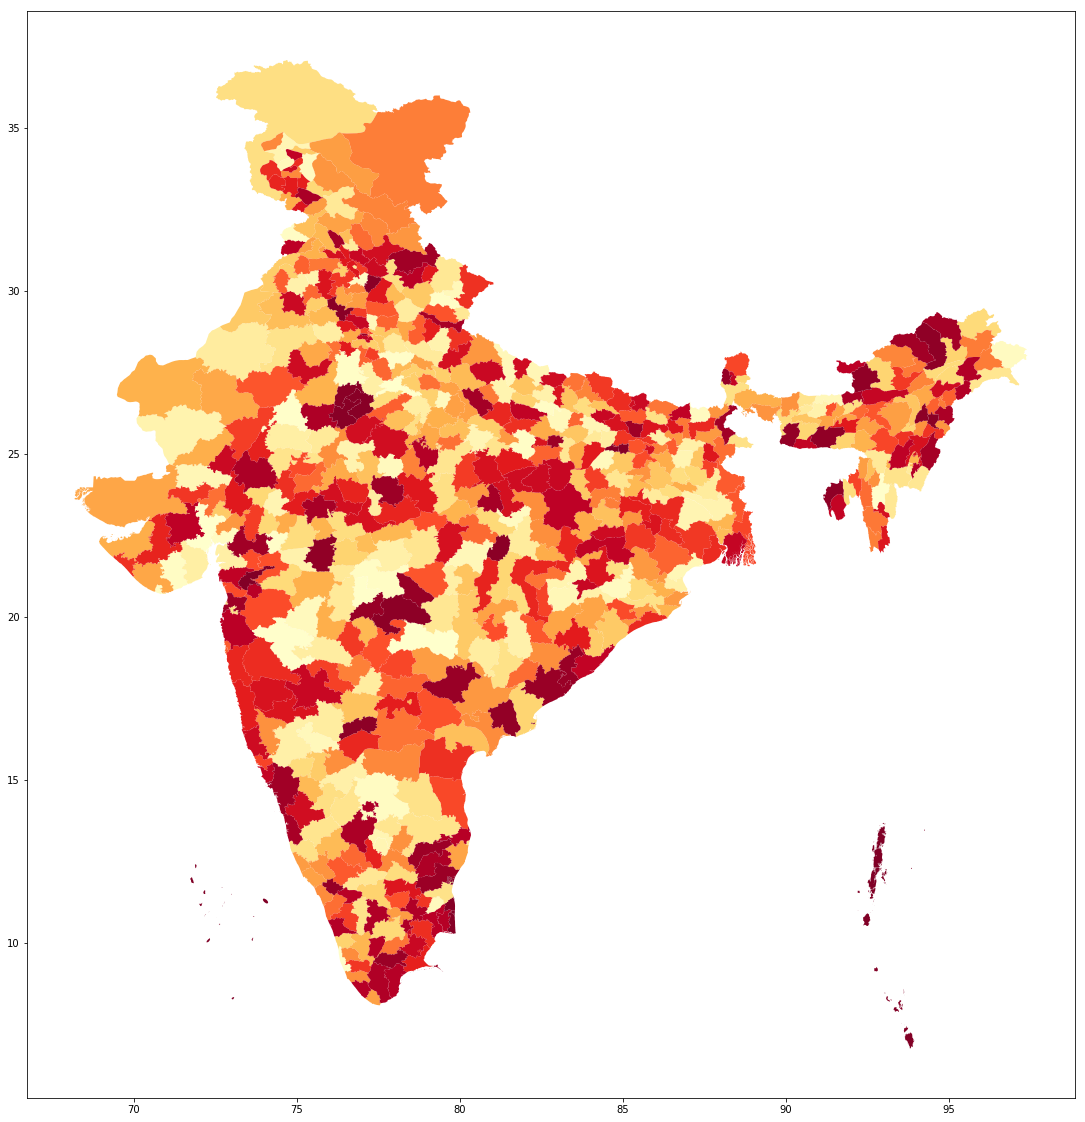

In [69]:
india.plot(cmap='YlOrRd', figsize=(20,20))

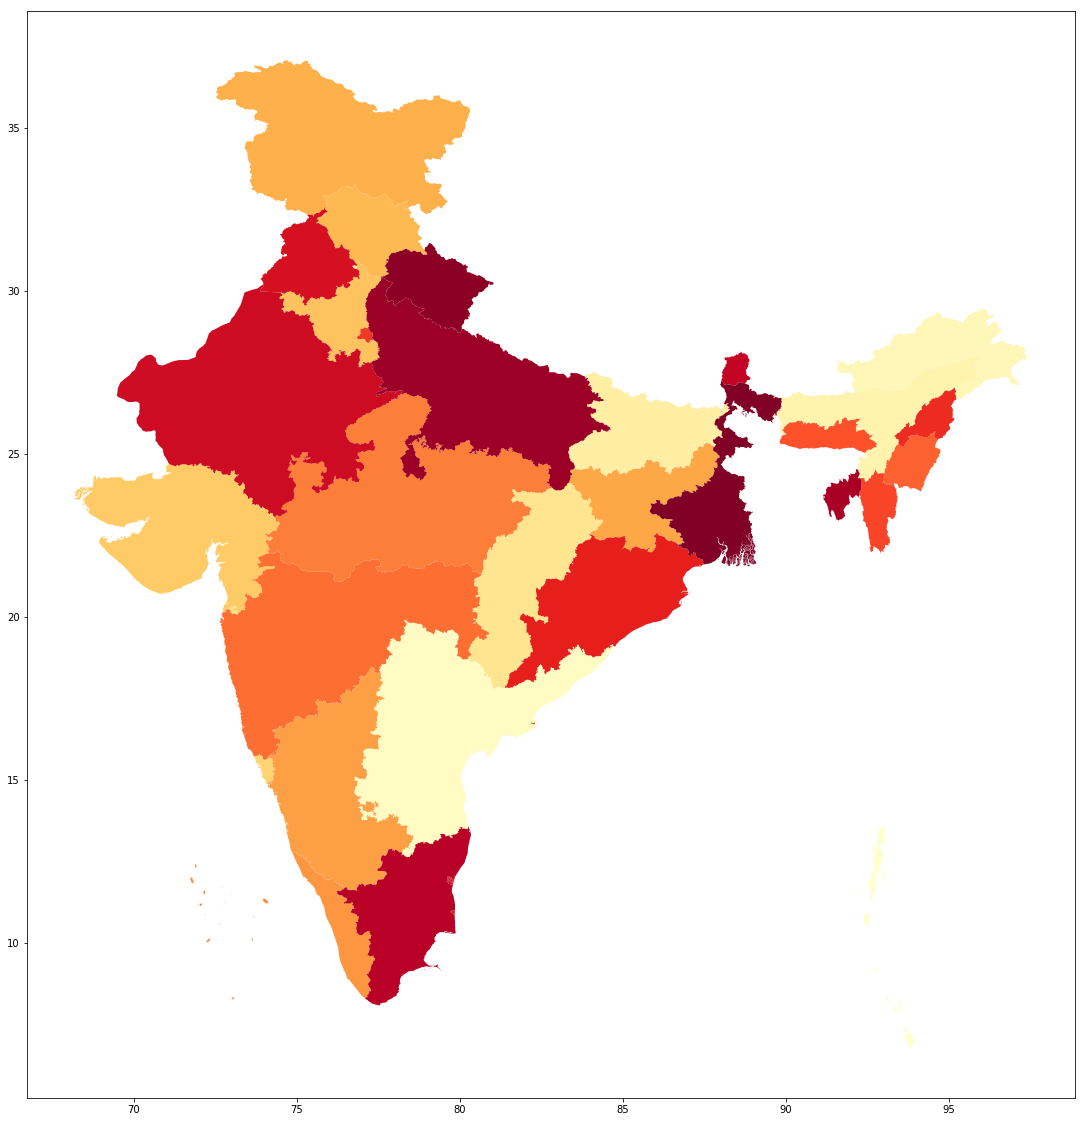

In [70]:
india_state = india.dissolve(by='State', aggfunc='sum')
india_state.plot(cmap='YlOrRd', figsize=(20,20))

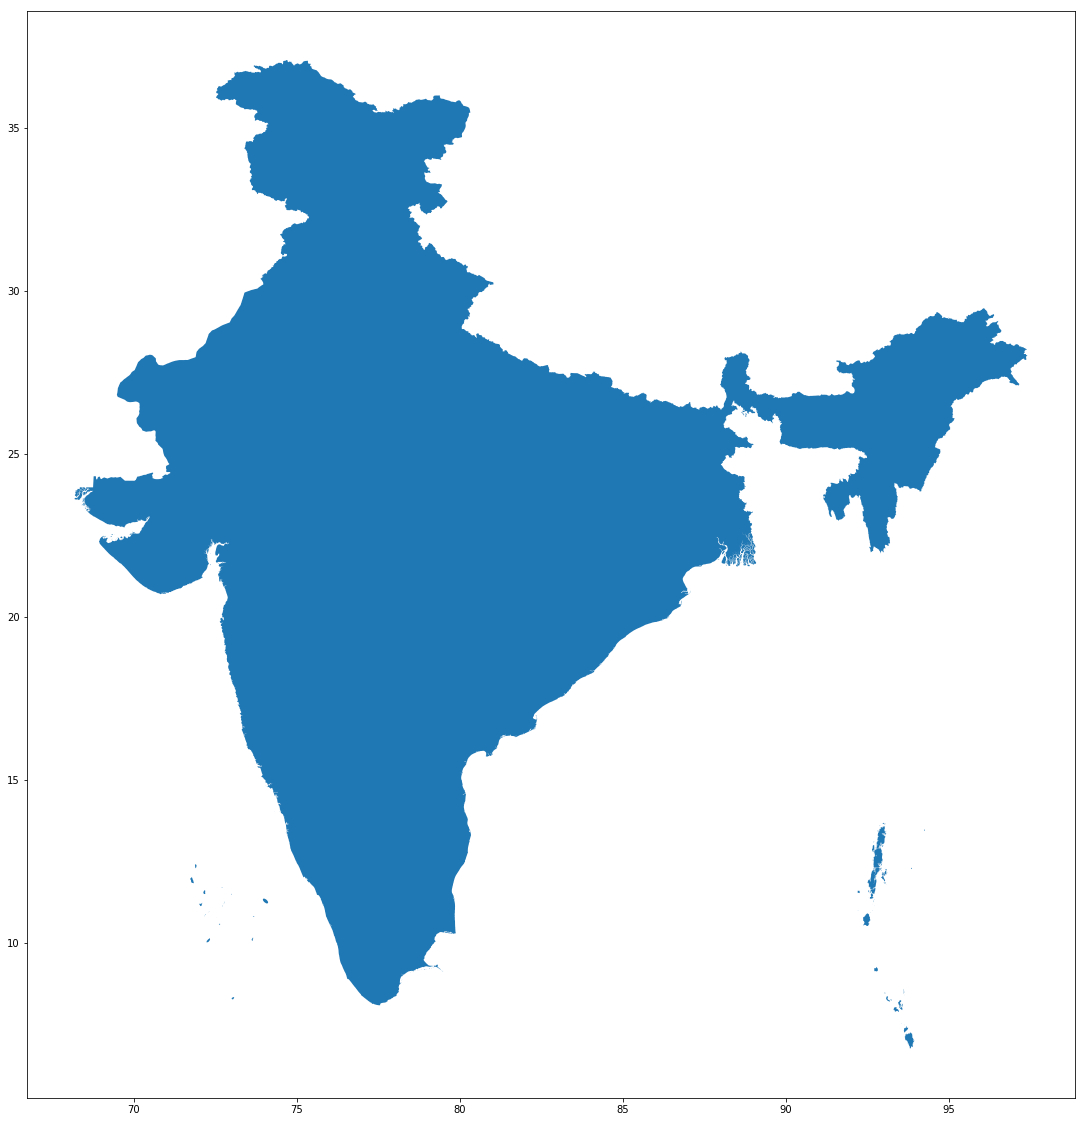

In [71]:
india_country = india.dissolve(by='Country', aggfunc='sum')
india_country.plot(figsize=(20,20))